# Detecting communities from Amazon product co purchasing network

## Step-1:

### a. Import dataset using networkx package

https://snap.stanford.edu/data/com-Amazon.html

In [1]:
import networkx as nx
import numpy as np
import pylab as pl
import scipy as sp
import time
import random
import queue
from IPython.display import display
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
raw_graph_file = r"\Downloads\com-amazon.ungraph.txt"

In [3]:
g = nx.read_edgelist(raw_graph_file)

### b. Identify the no. of nodes and edges

In [5]:
N, K = g.order(), g.size()

print("Number of nodes: ", N)
print("Number of edges: ", K)

Number of nodes:  334863
Number of edges:  925872


## Step-2:

### c. Create a subgraph out of the whole network

In [11]:
def get_subgraph_bfs(graph, start_node, num_node):
    node_set = set()
    probbed = {start_node}
    bfs_queue = queue.deque()
    bfs_queue.append(start_node)
    while len(bfs_queue) > 0:
        i = bfs_queue.popleft()
        node_set.add(i)
        for j in g[i]:
            if j not in probbed:
                probbed.add(j)
                bfs_queue.append(j)
        if len(node_set) >= num_node:
            return nx.subgraph(graph, node_set)

In [12]:
# Return subgraph of 1000 nodes in networkx undirect graph format
sub1k = get_subgraph_bfs(g, '1', 1000)

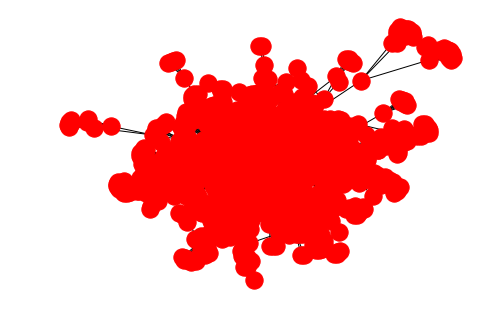

In [22]:
nx.draw(sub1k)

### d. Detect Communities from the subgraph using different community detection algorithms

In [32]:
import networkx.algorithms.community as nxcom
result = nxcom.girvan_newman(sub1k)
communities = next(result)
len(communities)

2

## Step-3:

[['500945', '278797', '402843', '514102', '204086', '238036', '97986', '396091', '289979', '339405', '72810', '147203', '216651', '254498', '160086', '321592', '272666', '163413', '75121', '47913', '137630', '462708', '10533', '98402', '382240', '366582', '112104', '118574', '417148', '456401', '244830', '154288', '353010', '536896', '176496', '249472', '356133', '378331', '143523', '161555', '97395', '18470', '494189', '9673', '462334', '380566', '536198', '310611', '50485', '52510', '268112', '496351', '404028', '152037', '226166', '193047', '58392', '517633', '294617', '126752', '462558', '105560', '361732', '378720', '50959', '13770', '254766', '440368', '23519', '502782', '192816', '343237', '101699', '23511', '453257', '211863', '158795', '482958', '66599', '385955', '278095', '370922', '275037', '384204', '302664', '543514', '59394', '333569', '245021', '386275', '304182', '260418', '297946', '489195', '11872', '169101', '397547', '490506', '420006', '58641', '506794', '228125',

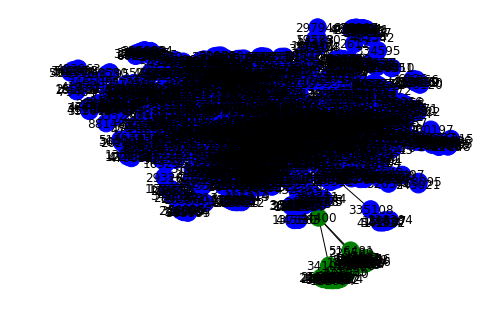

In [34]:
import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms.community.centrality import girvan_newman

communities = girvan_newman(sub1k)

node_groups = []
for com in next(communities):
    node_groups.append(list(com))

print(node_groups)

color_map = []
for node in sub1k:
    if node in node_groups[0]:
        color_map.append('blue')
    else: 
        color_map.append('green') 
        
nx.draw(sub1k, node_color=color_map, with_labels=True)
plt.show()